#Problem 1 - ANN Single Layer From Scratch 

In [3]:
from math import exp
from random import seed
from random import random
import math

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation, i):
  if i == 1: 
      return 1.0 / (1.0 + exp(-activation))
  elif i ==0:
      if activation >= 0:
          return activation 
      else: 
          return 0
  elif i == 2: 
      return math.tanh(activation)
  elif i == 3: 
      if activation >= 0:
          return activation 
      else: 
          return 0.01 * activation 

# Forward propagate input to a network output
def forward_propagate(network, row, i):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation, i)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs, activation

# Calculate the derivative of an neuron output
def transfer_derivative(output, i):
  if i == 1: 
      return output*(1-output)
  elif i ==0:
      if output >= 0:
          return 1 
      else: 
          return 0
  elif i == 2: 
      return 1-(output**2)
  elif i == 3: 
      if output >= 0:
          return 1 
      else: 
          return 0.01 

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected, i):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'], i)

# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']



def train_network(network, train, l_rate, n_epoch, n_outputs, index): 
    for epoch in range(n_epoch): 
        sum_error = 0
        for row in train: 
            outputs, activation = forward_propagate(network, row, index)
            #print('outputs are = ' + str(outputs))
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i] - outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected,  index)
            update_weights(network, row, l_rate)
        rows_no = len(train)
        max_error = rows_no * n_outputs
        accuracy = max_error - sum_error
        accuracy = accuracy/(n_outputs * rows_no)
        print('>epoch=%d, lrate = %.3f, error=%.3f, accuracy_ratio = %.3f' %(epoch, l_rate, sum_error, accuracy))
    if accuracy >=0:
        return accuracy
    else: 
        return 0



#Implimenting ANN on small data set

In [10]:
# Test training backprop algorithm
seed(1)
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]

n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))

print ('noutput = '+ str(n_inputs) + ' ninputs = ' + str(n_outputs) )


network = initialize_network(n_inputs, 5, n_outputs)
train_network(network, dataset, 0.1, 1, n_outputs, 1)


noutput = 2 ninputs = 2
>epoch=0, lrate = 0.100, error=8.412, accuracy_ratio = 0.579


0.579375280085649

#Iris Data Set 

##accesing and converting data to n-d array 

In [7]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/RanjithKalingeri/housing-price-/main/Iris.csv'
df = pd.read_csv(url)
#print(df)
data_raw = df.to_numpy()
#print (data)

def refine_data (data): 
    for i in range(data.shape[0]): 
        if data[i][5] == 'Iris-setosa':
            data[i][5] = 0
        elif data[i][5] == 'Iris-versicolor':
            data[i][5] = 1
        elif data[i][5] == 'Iris-virginica':
            data[i][5] = 2
    data = np.delete(data,[0],1)
    return data

data_iris = refine_data(data_raw)
print(data_iris[0:10])


[[5.1 3.5 1.4 0.2 0]
 [4.9 3.0 1.4 0.2 0]
 [4.7 3.2 1.3 0.2 0]
 [4.6 3.1 1.5 0.2 0]
 [5.0 3.6 1.4 0.2 0]
 [5.4 3.9 1.7 0.4 0]
 [4.6 3.4 1.4 0.3 0]
 [5.0 3.4 1.5 0.2 0]
 [4.4 2.9 1.4 0.2 0]
 [4.9 3.1 1.5 0.1 0]]


noutput = 3 ninputs = 4
number of hidden layers is = 0
>epoch=0, lrate = 0.100, error=119.489, accuracy_ratio = 0.734
number of hidden layers is = 2
>epoch=0, lrate = 0.100, error=110.020, accuracy_ratio = 0.756
number of hidden layers is = 3
>epoch=0, lrate = 0.100, error=138.761, accuracy_ratio = 0.692
number of hidden layers is = 4
>epoch=0, lrate = 0.100, error=133.988, accuracy_ratio = 0.702
number of hidden layers is = 5
>epoch=0, lrate = 0.100, error=119.632, accuracy_ratio = 0.734
number of hidden layers is = 15
>epoch=0, lrate = 0.100, error=299.640, accuracy_ratio = 0.334
number of hidden layers is = 20
>epoch=0, lrate = 0.100, error=299.899, accuracy_ratio = 0.334
number of hidden layers is = 25
>epoch=0, lrate = 0.100, error=300.000, accuracy_ratio = 0.333
number of hidden layers is = 40
>epoch=0, lrate = 0.100, error=300.000, accuracy_ratio = 0.333
number of hidden layers is = 50
>epoch=0, lrate = 0.100, error=300.000, accuracy_ratio = 0.333
number of hidden layers is = 64

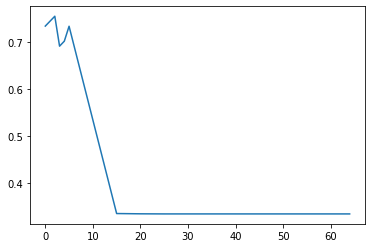

In [13]:
import matplotlib.pyplot as plt
seed(1)

n_inputs = len(data_iris[0]) - 1
n_outputs = len(set([row[-1] for row in data_iris]))
print ('noutput = '+ str(n_outputs) + ' ninputs = ' + str(n_inputs) )
'''

network = initialize_network(n_inputs, 10, n_outputs)
train_network(network, data_iris, 0.5, 200, n_outputs)
for layer in network:
	print(layer)
''' 

hidden_list = [0, 2,3,4, 5, 15, 20, 25, 40, 50, 64]


def get_accuracy_plot ( hidden_list, n_inputs, n_outputs, epoch, l_rate, data, index):
    accuracy = []
    for i in hidden_list:
        print('number of hidden layers is = ' + str(i))
        network = initialize_network(n_inputs, i, n_outputs)
        temp = train_network(network, data, l_rate, epoch, n_outputs, index)
        accuracy.append(temp)
    print(accuracy)
    plt.plot(hidden_list, accuracy)

get_accuracy_plot(hidden_list, n_inputs, n_outputs, 1, 0.1, data_iris, 1)
    
